<a href="https://colab.research.google.com/github/Rioki-peter/Analyzing-Visualizing-Data-PowerBI/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google import colab
colab.drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os 

path = '/content/gdrive/My Drive/colab/' # specify your directory where you want to create a folder for storing data.


In [ ]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [ ]:
df = pd.read_csv(path+'/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploring the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
(df.isna().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
data=df.copy()

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data1=data.drop('Cabin', axis=1)

In [ ]:
round(data1.isna().sum()/len(data1),3)

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age            0.199
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Embarked       0.002
dtype: float64

In [ ]:
data1.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [ ]:
data1['Age']=data1.Age.fillna(data1.Age.median())

In [ ]:
data1.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data1['Embarked']=data1['Embarked'].fillna(data1['Embarked'].mode()[0])

In [ ]:
data1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
data1=data1.drop(['Name','Ticket','PassengerId'],1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
cat_obj=data1.select_dtypes(include='object')
cat_obj.columns


Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
df=pd.get_dummies(data1, columns=['Sex','Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


Separate into dependent variable (target, label, criterion or response variable) and independent variables( input features,predictors)

In [ ]:
x=df.drop('Survived', axis=1)   #Independent variables( input features,predictors)
y=df.Survived   
x          #dependent variable (target, label, criterion or response variable)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=150)


In [ ]:
x_train.shape, x_test.shape, x.shape

((668, 10), (223, 10), (891, 10))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic=LogisticRegression(max_iter=200,solver='liblinear')

In [ ]:
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_predict=logistic.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score

In [ ]:
accuracy_score(y_test,y_predict)

0.8699551569506726

In [ ]:
recall_score(y_test,y_predict)

0.8089887640449438

In [ ]:
precision_score(y_test,y_predict)

0.8571428571428571

In [ ]:
f1_score(y_test,y_predict)

0.8323699421965318

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(712, 10)

In [ ]:
x.shape

(891, 10)

In [ ]:
x_test.shape

(179, 10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logic=LogisticRegression(max_iter=200,solver='liblinear')

In [ ]:
logic.fit(x_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_pred=logic.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7932960893854749

In [ ]:
recall_score(y_test,y_pred)

0.7162162162162162

In [ ]:
precision_score(y_test,y_pred)

0.7681159420289855

In [ ]:
f1_score(y_test,y_pred)

0.7412587412587412

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_t=dtree.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_t)

0.7821229050279329

In [ ]:
recall_score(y_test,pred_t)

0.7702702702702703

In [ ]:
precision_score(y_test,pred_t)

0.7215189873417721

In [ ]:
f1_score(y_test,pred_t)

0.7450980392156862

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x.shape, x_train.shape, x_test.shape

((891, 10), (712, 10), (179, 10))

##CLASSIFICATION

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic=LogisticRegression(max_iter=500)

In [ ]:
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
pr=logistic.predict(x_train)

In [ ]:
prediction=logistic.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, confusion_matrix

In [ ]:
accuracy_score(y_test, prediction)

0.8100558659217877

In [ ]:
recall_score(y_test,prediction)

0.7432432432432432

In [ ]:
precision_score(y_test, prediction)

0.7857142857142857

In [ ]:
f1_score(y_test, prediction)

0.7638888888888888

In [ ]:
confusion_matrix(y_test,prediction)

array([[90, 15],
       [19, 55]])

Check and remove outliers if any

check if there is need to scale your data

check if there is need to select important features

check better technique to handle missing values  

Build logistic regression model and comment of accuracy improvement

###K-NEAREST NEIGHBORS ALGORITHM (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_predict=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test, knn_predict)

0.7150837988826816

In [ ]:
recall_score(y_test,knn_predict)

0.527027027027027

In [ ]:
precision_score(y_test, knn_predict)

0.7090909090909091

In [ ]:
f1_score(y_test, knn_predict)

0.6046511627906976

###DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Build a decision tree model, evaluate it and report on the model performance

###Random Forest

Build random forest classifier, and comment on the model perfomance, then compare with previous models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest=RandomForestClassifier(random_state=2, n_estimators=400)

In [ ]:
rforest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=2)

In [ ]:
rf_predict=rforest.predict(x_test)

In [ ]:
accuracy_score(y_test,rf_predict)

0.8100558659217877

In [ ]:
recall_score(y_test,rf_predict)

0.7567567567567568

In [ ]:
precision_score(y_test,rf_predict)

0.7777777777777778

In [ ]:
f1_score(y_test,rf_predict)

0.7671232876712328

In [ ]:
confusion_matrix(y_test,rf_predict)

array([[89, 16],
       [18, 56]])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB=XGBClassifier(n_estimators=1000,learning_rate=0.3,random_state=20,min_child_weight=2)

In [ ]:
XGB.fit(x_train,y_train)

XGBClassifier(learning_rate=0.3, min_child_weight=2, n_estimators=1000,
              random_state=20)

In [ ]:
xgb_predict=XGB.predict(x_test)

In [ ]:
print('Accuracy score for XGboost', accuracy_score(y_test,xgb_predict))
print('Recall score for XGboost', recall_score(y_test,xgb_predict))
print('Precision score for XGboost', precision_score(y_test,xgb_predict))
print('F1  score for XGboost', f1_score(y_test,xgb_predict))

Accuracy score for XGboost 0.8156424581005587
Recall score for XGboost 0.7972972972972973
Precision score for XGboost 0.7662337662337663
F1  score for XGboost 0.7814569536423841


###ROCAUC

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ROCAUC
from yellowbrick.exceptions import YellowbrickValueError

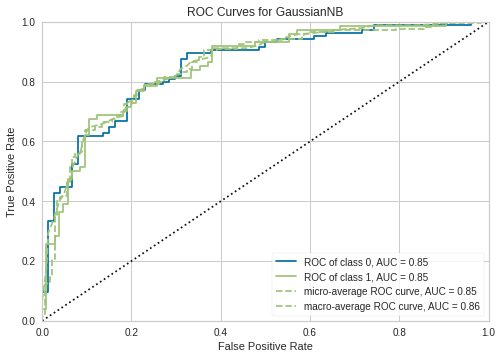

In [ ]:
model=GaussianNB()
visualizer = ROCAUC(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test) 
visualizer.poof()

Plot ROCAUC for logistic reggression and XGboost

**Use LOANDATA to predict Credit Score Group. Use atleast 5 Machine learning models and compare their perfomance. Use at least 5 evaluation metrics to report your findings and suggest most robust model which can be used to predict credit score of a client.**

##REGRESSION

In [ ]:
houuse_price=house_prices = pd.read_csv(path+'/housing.csv')

In [ ]:
houuse_price.head()

R_SQUARED- The closer to one the better model 

MEAN SQUARE ERROR(MSE)- The closer to zero the better the model

ROOT MEAN SQUARE ERROR (RMSE)-The closer to zero the better the  model

MEAN ABSOLUTE ERROR (MAE)-The closer to zero the better the model
 

In [ ]:
houuse_price.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df=pd.get_dummies(houuse_price, columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
x=df.drop('median_house_value', 1)
y=df.median_house_value

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x,train_y,test_y=train_test_split(x,y,test_size=0.2, random_state=300)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()
linear.fit(train_x,train_y)

LinearRegression()

In [ ]:
predic=linear.predict(test_x)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from math import sqrt

In [ ]:
r2_score(test_y,predic)

In [ ]:
sqrt(mean_squared_error(test_y, predic))

In [ ]:
mean_absolute_error(test_y, predic)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(random_state=2)

In [ ]:
rf.fit(train_x, train_y)

In [ ]:
predrf=rf.predict(x_test)

In [ ]:
print('R_Squared',r2_score(test_y, predrf))

In [ ]:
print('RMSE',sqrt(mean_squared_error(test_y,predrf)))

In [ ]:
print('MAE', mean_absolute_error(test_y,predrf))

Polynomial regression

Decision Regressor

KNN Regressor

SVR (Support Vector Regressor)

####Feature Importance 

In [ ]:
!pip install yellowbrick==0.4.2

In [ ]:
from yellowbrick import model_selection


In [ ]:
# from yellowbrick.model_selection import CVScores, FeatureImportances
# from yellowbrick.exceptions import YellowbrickValueError

In [ ]:
model= DecisionTreeClassifier()
visualizer = FeatureImportances(model)
visualizer.fit(x_train , y_train)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
# GB=GaussianNB()
# GB.fit(x_train,y_train)
# # Testing Set
# probas_ = GB.predict_proba(x_test)
# fpr_rf, tpr_rf, thresholds = roc_curve(y_test, probas_[:, 1])
# roc_auc_GB= auc(fpr_rf, tpr_rf)
# test, = plt.plot(fpr_rf, tpr_rf, label = 'GaussianNB' +str(round(roc_auc_GB,4)))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

# print('Area Under the Curve (AUC): ', roc_auc_GB)

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE

In [ ]:
# Feature extraction
model=XGBClassifier()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
# summarize all features
for i in range(x.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))


###Feature Selection using Wrapper method

In [ ]:
# report which features were selected by RFE
from sklearn.feature_selection import RFE
dt=DecisionTreeClassifier()
rfe = RFE(estimator=dt, n_features_to_select=10)
rfe.fit(x, y)

Running the example lists of the 10 input features and whether or not they were selected as well as their relative ranking of importance.

In [ ]:
# summarize all features
for i in range(x.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import mean,std


In [ ]:
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
# fit RFE
rfe.fit(x, y)
# summarize all features
for i in range(x.shape[1]):
  print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
x.columns